# **NBA draft analysis**

                                                                                                    
       .%%%%%%    ####      %%%%%%%%%%     %%%%%%%%%%%       %%%%%%%     %%%%%%%%%% %%%%%%%%%%%%&   
       %%%%%%%   #####      %%%%%%%%%%%%   %%%%%%%%%%%%&     %%%*%%%&    %%%%%%%%%% %%%%%%%%%%%%&   
       %%%       #####      %%%%%   %%%%&  %%%%%   %%%%%    /%%% %%%%    %%%%%          %%%%%       
       %&          ###      %%%%%   %%%%%  %%%%%   %%%%%    %%%% %%%%    %%%%%          %%%%%       
       %        #  ###      %%%%%   %%%%%  %%%%%   %%%%%    %%%% %%%%    %%%%%          %%%%%       
       %*      ###  ##      %%%%%   %%%%%  %%%%%   %%%%%    %%%% %%%%%   %%%%%          %%%%%       
       %        ##(  #      %%%%%   %%%%%  %%%%%   %%%%%   ,%%%& %%%%%   %%%%%&&&&      %%%%%       
       %/                   %%%%%   %%%%%  %%%%%   %%%%%   %%%%& &%%%%   %%%%%%%%%      %%%%%       
       %%%       #   (      %%%%%   %%%%%  %%%%%%%%%%%%    %%%%, .%%%%   %%%%%          %%%%%       
       %%%%%      ####      %%%%%   %%%%%  %%%%%%%%%%      %%%%   %%%%(  %%%%%          %%%%%       
       %%%%%%%     ###      %%%%%   %%%%%  %%%%% /%%%%    .%%%%%%%%%%%%  %%%%%          %%%%%       
       %%%%%%%%%%  ###      %%%%%   %%%%%  %%%%%  %%%%%   %%%%%%%%%%%%%  %%%%%          %%%%%       
       %%,&%. & %%  ##      %%%%%  /%%%%%  %%%%%  %%%%%   %%%%%   %%%%%  %%%%%          %%%%%       
       %%  %.   &%% ##      %%%%%%%%%%%%   %%%%%   %%%%%  %%%%%   %%%%%, %%%%%          %%%%%       
        %%%%%%%%%%& %       %%%%%%%%%      %%%%%   %%%%%  %%%%&   (%%%%& %%%%%          %%%%&       

Jakub Hajko

2022/2023 (Letný semester)

NMAI059 (Pravdepodobnosť a štatistika 1)

## Introduction and Motivation

For those who don't know, the NBA (National Basketball Association) is a basketball league that spans the USA and Canada. It is widely regarded as the best basketball league globally, featuring the top players in the world. The NBA Draft is an annual event in which NBA teams select new players to join their rosters, offering a pathway for teams to acquire young talent. Players become eligible for the draft once they meet specific age and eligibility criteria, typically after completing their college or international basketball careers. Teams take turns selecting players in a predetermined order, with the team that performed the worst in the previous season usually receiving the first pick. The NBA Draft plays a crucial role in team building and rejuvenation, often introducing exciting new talent to the league.

I decided to analyze data from the NBA Draft because the NBA is my passion. Additionally, statistical methods are employed in the NBA Draft, making it intriguing to explore these methods myself. I will analyze and test three hypothesis: 1.Are the first picks best scorers?, 2.Are international players better shooters?, 3.Players now are much better 3pt shooters then they used to be.

## Data

I downloaded the data from the https://www.kaggle.com/datasets/mattop/nba-draft-basketball-player-data-19892021

The dataset contains all NBA Draft picks from 1989-2021. Dataset consists of year, overall pick and player data.

In [1]:
import csv
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import random

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data_file_name = 'nbaplayersdraft.csv'
df = pd.read_csv(data_file_name)

## Hypothesis 1. "Are the first picks best scorers?"
---

In the NBA, offensive-minded players are usually valued more than, for example, defensive players. This means that the player taken with the first pick is typically the best scorer from the draft class. Let's test the hypothesis: ***"Players taken with the first pick average more points per game (PPG) throughout their career than those taken with the sixth pick."***

So, we formulate the null and alternative hypotheses as follows:

- **H_0** - "There is no significant difference between the career PPG of players taken with the 1st pick and players taken with the 6th pick," or simply 'PPG_1 = PPG_6.'

- **H_A** - "Players taken with the 1st pick tend to average more PPG than the players taken with the 6th pick," or simply 'PPG_1 > PPG_6.

Judging by H_0 and H_A, as well as the data (only 33 1st picks and 33 6th picks), we will use a two-sample (independent), one-tailed t-test to calculate the p-value.

Let us set the significance level, ***alpha***, to be 0.05.

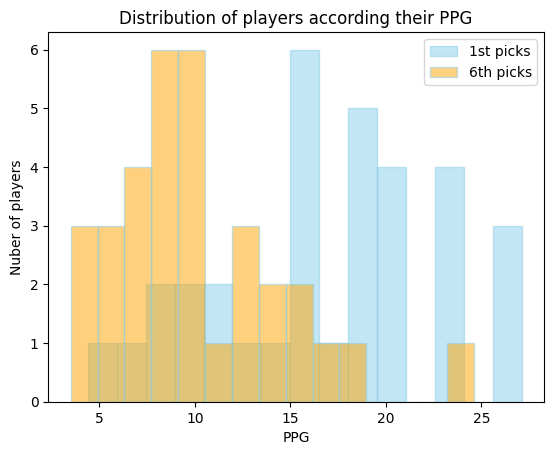

In [ ]:
PPG_1picks = df[df['overall_pick'] == 1]['points_per_game'].to_numpy()
PPG_6picks = df[df['overall_pick'] == 6]['points_per_game'].to_numpy()

plt.hist(PPG_1picks, bins=15, alpha=0.5, color='skyblue', edgecolor='skyblue', label='1st picks')
plt.hist(PPG_6picks, bins=15, alpha=0.5, color='orange', edgecolor='skyblue', label='6th picks')
plt.xlabel('PPG')
plt.ylabel('Nuber of players')
plt.title('Distribution of players according their PPG')
plt.legend()
plt.show()

So we can empirically observe that the hypothesis may indeed be true. Additionally, we can observe that the data approximately follows a normal distribution.

Now, let's proceed to test the hypothesis.

In [ ]:
# Perform a one-tailed two-sample t-test (greater than)
t_stat, p_value = stats.ttest_ind(PPG_1picks, PPG_6picks, alternative='greater')

# Print the p-value
print("P-value:", p_value)

P-value: 1.4669844617556105e-06


p-value (1.4669844617556105e-06) < ***alpha*** (0.05).

Therefore, we can reject H_0 (null hypothesis) and confidently state that first picks tend to be better scorers.

## Hypothesis 2. "Are international players better shooters?"
---

Most of the US players get to the NBA from the NCAA (college league), where they really emphasize athleticism. On the other hand, players from Europe tend to have better technique but are not usually extraordinary athletes (e.g., Nikola Jokic, Luka Doncic). One of the most important areas in basketball technique is shooting; players with superior technique tend to have a higher field goal percentage (FG%), which is calculated as made shots over attempted shots. Let's test the hypothesis: ***"Players who didn't play in the NCAA have a better FG% than those who played in the NCAA."***

So, we formulate the null and alternative hypotheses as follows:

- **H_0** - "There is no significant difference between the career FG% of players who used to play in the NCAA and players who didn't play in the NCAA (high school, international, G-league)," or simply 'FG_not_NCAA = FG_NCAA.'

- **H_A** - "Players who didn't play in the NCAA tend to have a higher career FG% than the players who used to play in the NCAA," or simply 'FG_not_NCAA > FG_NCAA.'

Judging by H_0 and H_A, as well as the data, we will use a two-sample (independent), one-tailed t-test to calculate the p-value. Note that player that, for example, shot only once and made the shot have FG% of 100. It could certainly affect our results in a negative way so for this time, we will only consider players that scored >= 500 points in the NBA.

Let us set the significance level, ***alpha***, to be 0.05.

This time we have more data to work with so we will take samples of size 100.

In [ ]:
# Filter out players that didn't score atleast 500 points
df_above_500 = df[df['points'] >= 500]

# Players not from NCAA have NaN value in column 'college'
FG_not_NCAA = list(df_above_500[df_above_500['college'].isna()]['field_goal_percentage'])
# Players from NCAA have college name in column 'college'
FG_NCAA = list(df_above_500[~df_above_500['college'].isna()]['field_goal_percentage'])

# Sample out 100 data for both FG_not_NCAA and FG_NCAA
random.seed(67)
FG_not_NCAA = np.array(random.sample(FG_not_NCAA,100))
FG_NCAA = np.array(random.sample(FG_NCAA,100))

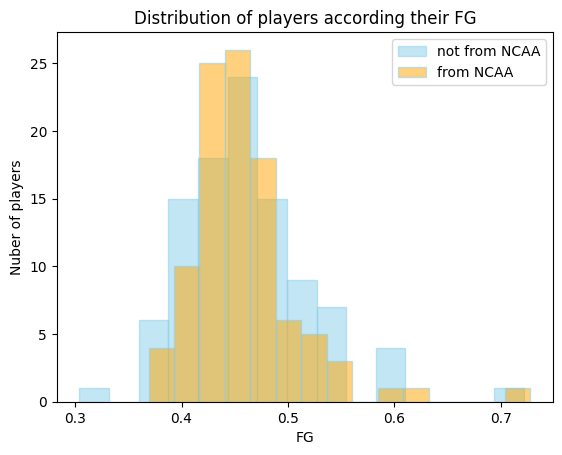

In [ ]:
plt.hist(FG_not_NCAA, bins=15, alpha=0.5, color='skyblue', edgecolor='skyblue', label='not from NCAA')
plt.hist(FG_NCAA, bins=15, alpha=0.5, color='orange', edgecolor='skyblue', label='from NCAA')
plt.xlabel('FG')
plt.ylabel('Nuber of players')
plt.title('Distribution of players according their FG')
plt.legend()
plt.show()

Now it is not so clear whether the hypothesis is true or not but still we can observe that the data approximately follows a normal distribution.

Now, let's proceed to test the hypothesis.

In [ ]:
# Perform a one-tailed two-sample t-test (greater than)
t_stat, p_value = stats.ttest_ind(FG_not_NCAA, FG_NCAA, alternative='greater')

# Print the p-value
print("P-value:", p_value)

P-value: 0.395104412216361


p-value (0.395104412216361) > ***alpha*** (0.05).

Therefore, we are ***not*** able reject H_0 (null hypothesis). It is probably myth that players not from the NCAA are better shooters.

## Hypothesis 3. "Players now are much better 3pt shooters then they used to be."
---

Like everything else, the NBA is evolving. In the 80s and 90s, big and strong players used to dominate the league (e.g., Shaquille O’Neal), but the league changed, and now the players who are exceptional 3-point shooters dominate the league (e.g., Stephen Curry). Does this mean that players drafted recently have a better 3PT percentage (the same thing as FG but with 3-point shots) than those drafted in the 90s? Let's test the hypothesis: ***"Players drafted between 2008 and 2012 (from now referred to as 'new') have a better 3PT% than those drafted between 1989 and 1993 (from now referred to as 'old')"***.

So, we formulate the null and alternative hypotheses as follows:

- **H_0** - "There is no significant difference between the career 3PT% of new generation and old generation of players," or simply '3PT%_new = 3PT%_old.'

- **H_A** - "Players from the new generation tend to have a higher career 3PT% than the players from the old generation," or simply '3PT%_new > 3PT%_old.'

Judging by H_0 and H_A, as well as the data, we will use a two-sample (independent), one-tailed t-test to calculate the p-value. Note that player that, for example, shot 3pt only once and made the shot have 3PT% of 100. It could certainly affect our results in a negative way so for this time, we will only consider players that scored >= 500 points in the NBA.

Let us set the significance level, ***alpha***, to be 0.05.

We will take samples of size 100.

In [ ]:
mask_new = (df_above_500['year'] >= 2008) & (df_above_500['year'] <= 2012)
mask_old = (df_above_500['year'] >= 1989) & (df_above_500['year'] <= 1993)

# Players from the old generation
old_generation_3pt = list(df_above_500[mask_old]['3_point_percentage'])
# Players from the new generation
new_generation_3pt = list(df_above_500[mask_new]['3_point_percentage'])

# Sample out 100 data for both
old_generation_3pt = np.array(random.sample(old_generation_3pt,100))
new_generation_3pt = np.array(random.sample(new_generation_3pt,100))

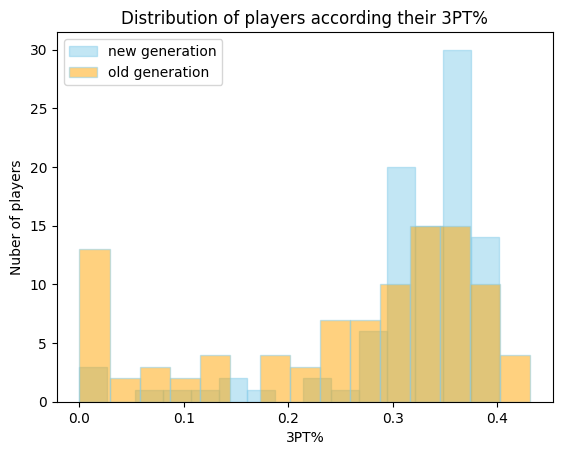

In [ ]:
plt.hist(new_generation_3pt, bins=15, alpha=0.5, color='skyblue', edgecolor='skyblue', label='new generation')
plt.hist(old_generation_3pt, bins=15, alpha=0.5, color='orange', edgecolor='skyblue', label='old generation')
plt.xlabel('3PT%')
plt.ylabel('Nuber of players')
plt.title('Distribution of players according their 3PT%')
plt.legend()
plt.show()

Empirically it seems promising that the hypothesis may indeed be true. Additionally, we can observe that the data approximately follows a normal distribution.

Now, let's proceed to test the hypothesis.

In [ ]:
new_generation_3pt[np.isnan(new_generation_3pt)] = 0.
old_generation_3pt[np.isnan(old_generation_3pt)] = 0.

# Perform a one-tailed two-sample t-test (greater than)
t_stat, p_value = stats.ttest_ind(new_generation_3pt, old_generation_3pt, alternative='greater')

# Print the p-value
print("P-value:", p_value)

P-value: 0.00044501365030253113


p-value (0.00044501365030253113) < ***alpha*** (0.05).

Therefore, we can reject H_0 (null hypothesis) and confidently state that the new generation are better shooters than those from the old generation.

## Summary

I tested three hypotheses and for all of them I used student's t-test. I was able to reject 2 out of 3 null hypotheses. It was fun^^.